# KARTIK KHANDELWAL
## LET'S GROW MORE (VIP)
> ### - Data Science Internship
### ADVANCED LEVEL TASK - 3

### *HANDWRITTEN EQUATION SOLVER USING CNN*
> *Dataset - [Handwritten Math Symbols](https://www.kaggle.com/sagyamthapa/handwritten-math-symbols)*

![](https://images.prismic.io/texthelp-website-proof/75743780-be41-4d83-bd73-728b0add137e_EquatIO+Hero+Product+Screen.png?auto=compress,format)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.models import model_from_json
import warnings
warnings.filterwarnings('ignore')

In [2]:
json_file = open('../input/handwritten-math-symbols-modelh5/model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../input/handwritten-math-symbols-modelh5/model_final.h5")


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

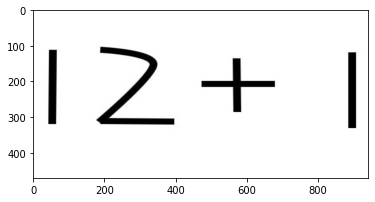

In [3]:
img_data = '../input/handwritten-math-symbols-modelh5/test.jpeg'
read = plt.imread(img_data, format='jpg')
plt.imshow(read)

In [4]:
image = cv2.imread('../input/handwritten-math-symbols-modelh5/test.jpeg')
image = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [5]:
ret, binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

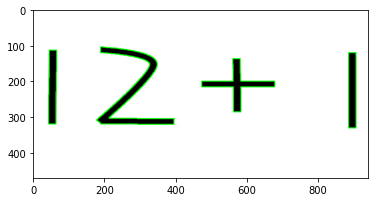

In [6]:
image = cv2.drawContours(image, contours, -1, (0,255,0), 2)
plt.imshow(image)
plt.show()

In [7]:
ctrs = contours
cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
w=int(128)
h=int(128)
train_data=[]
print(len(cnt))
rects=[]
for c in cnt :
    x,y,w,h= cv2.boundingRect(c)
    rect=[x,y,w,h]
    rects.append(rect)
print(rects)

4
[[43, 112, 24, 208], [178, 103, 219, 218], [473, 136, 206, 150], [885, 119, 22, 212]]


In [8]:
bool_rect=[]
for r in rects:
    l=[]
    for rec in rects:
        flag=0
        if rec!=r:
            if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                flag=1
            l.append(flag)
        if rec==r:
            l.append(0)
    bool_rect.append(l)
print(bool_rect)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [9]:
dump_rect=[]
for i in range(0,len(cnt)):
    for j in range(0,len(cnt)):
        if bool_rect[i][j]==1:
            area1=rects[i][2]*rects[i][3]
            area2=rects[j][2]*rects[j][3]
            if(area1==min(area1,area2)):
                dump_rect.append(rects[i])
print(len(dump_rect)) 

0


In [10]:
final_rect=[i for i in rects if i not in dump_rect]
print(final_rect)

[[43, 112, 24, 208], [178, 103, 219, 218], [473, 136, 206, 150], [885, 119, 22, 212]]


In [11]:
for r in final_rect:
    x=r[0]
    y=r[1]
    w=r[2]
    h=r[3]
    im_crop =binary[y:y+h+10,x:x+w+10]


    im_resize = cv2.resize(im_crop,(128,128))

    im_resize=np.reshape(im_resize,(1,128,128))
    train_data.append(im_resize)

In [12]:
reverse_mapping={0: '0', 1: '8', 2: '3', 3: '2', 4: '4', 5: '5', 6: '6', 7: '7', 8: '1', 9: '9',
                 10: '+', 11: '.', 12: '/', 13: '=', 14: '*', 15: '-'}

def mapper(value):
    return reverse_mapping[value]

In [13]:
equation=''
for i in range(len(train_data)):
    test_img = np.expand_dims(train_data[i],axis = 0)
    test_img = test_img.reshape(1,128,128,1)
    result = loaded_model.predict(test_img)
    value=np.argmax(result)
    move_name=mapper(value)
    equation = equation + move_name
    
print(equation)
eval(equation)

2021-10-21 11:57:53.588085: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


12+1


13